### Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import re 
import geopandas as gpd
import pandas as pd
import json
import datetime
import matplotlib.dates as mdates


# Bokeh Shape Files

In [2]:
contiguous_usa = gpd.read_file('map_data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
# Remove Alaska and Hawaii
contiguous_usa= contiguous_usa.loc[~contiguous_usa['NAME'].isin(['Alaska', 'Hawaii'])]

## Clean the Shape File City Names

#### Cleaning Utilities 

In [3]:
def border_states_redacted(name):
    if ('--' in name):
        entry_split= name.split(',')
        city_name=entry_split[0]
        states = entry_split[1].split('--')
        for i in states:
            print(city_name,i)
            
def border_states(name):
    if ('--' in name or '-' in name):
        entry_split= name.split(',')
        if (len(entry_split[0].split('--'))>1):
            print(entry_split[0].split('--'))
        city_name= entry_split[0].split('--')[0]
        state = entry_split[1].split('--')[0]
        return ','.join([city_name,state])
    else: 
        return name

#### Perform the Cleaning

In [4]:
urban_areas_usa = gpd.read_file('map_data/cb_2018_us_ua10_500k/cb_2018_us_ua10_500k.shp')
urban_areas_usa = urban_areas_usa.rename(columns={"NAME10": "city_name"})  

# Fix forth Worth from Ft.Worth to Fort Worth or something like that
#urban_areas_usa['city_name'][urban_areas_usa['city_name'].str.contains('-')]
#urban_areas_usa['city_name'] = urban_areas_usa['city_name'].apply(border_states)
#urban_areas_usa.loc[urban_areas_usa['city_name'].loc[urban_areas_usa['city_name']=='Nashville-Davidson, TN'].index.values[0],'city_name'] = 'Nashville, TN' 
#urban_areas_usa.loc[urban_areas_usa['city_name'].loc[urban_areas_usa['city_name']=='Lexington-Fayette, KY'].index.values[0],'city_name'] = 'Lexington, KY' 

In [5]:
urban_areas_usa.sample(5)

,UACE10,AFFGEOID10,GEOID10,city_name,LSAD10,UATYP10,ALAND10,AWATER10,geometry
3137,53956,400C100US53956,53956,"Manitowoc, WI",76,C,64337520,1862498,"POLYGON ((-87.75497 44.06683, -87.75431 44.066..."
729,11728,400C100US11728,11728,"Burlington, NC",75,U,234202344,2043317,"MULTIPOLYGON (((-79.17152 36.07697, -79.17011 ..."
2218,82873,400C100US82873,82873,"Solvang--Buellton--Santa Ynez, CA",76,C,19749640,2595,"MULTIPOLYGON (((-120.12283 34.66797, -120.1182..."
919,90784,400C100US90784,90784,"Vinita, OK",76,C,9294684,0,"MULTIPOLYGON (((-95.12546 36.65603, -95.11953 ..."
457,96832,400C100US96832,96832,"Wisconsin Rapids, WI",76,C,55616773,1280580,"MULTIPOLYGON (((-89.78063 44.42605, -89.77878 ..."


# Load the FISC Data

In [6]:
filepath= 'data/demographics/budgets.csv'
budgets_df = pd.read_csv(filepath)

def convert_name(name):
    nm_list = name.split(':')[::-1]
    return ', '.join(nm_list).strip()
    
budgets_df['city_merge_name'] = budgets_df['city_name'].apply(convert_name)
budgets_df['state'] = budgets_df['city_name'].apply(lambda name:name.split(":")[0])
budgets_df[budgets_df.year==2017].head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,city_merge_name,state
40,2017,AK: Anchorage,22002001.0,297216,1.0,5694.71,4819.11,2087.49,130.60,1956.89,...,2011.64,NaN,NaN,NaN,4.0,NaN,NaN,1.0,"Anchorage, AK",AK
81,2017,AK: Fairbanks,22006001.0,32015,1.0,1875.06,1875.06,654.10,4.09,650.01,...,6009.89,Fairbanks North Star,21006002.0,100683.0,5.0,NaN,NaN,0.0,"Fairbanks, AK",AK
122,2017,AL: Birmingham,12037003.0,211436,1.0,3655.60,2424.82,213.32,45.73,167.59,...,2879.90,Jefferson,11037037.0,660326.0,1.0,24693.0,1.0,0.0,"Birmingham, AL",AL
163,2017,AL: Mobile,12049004.0,191885,1.0,2408.76,2083.78,90.65,43.90,46.75,...,1497.00,Mobile,11049049.0,415499.0,2.0,25673.0,1.0,0.0,"Mobile, AL",AL
204,2017,AL: Montgomery,12051001.0,200360,1.0,1889.79,1339.40,141.95,24.14,117.81,...,1797.75,Montgomery,11051051.0,227072.0,2.0,28347.0,1.0,0.0,"Montgomery, AL",AL


In [7]:
pd.options.display.max_rows = 999
for i in budgets_df['city_merge_name'].unique():
    print(i)


Anchorage, AK
Fairbanks, AK
Birmingham, AL
Mobile, AL
Montgomery, AL
Ft. Smith, AR
Little Rock, AR
Mesa, AZ
Phoenix, AZ
Tucson, AZ
Average for Cities
Anaheim, CA
Bakersfield, CA
Fremont, CA
Fresno, CA
Huntington Beach, CA
Long Beach, CA
Los Angeles, CA
Modesto, CA
Oakland, CA
Riverside, CA
Sacramento, CA
San Diego, CA
San Francisco, CA
San Jose, CA
Santa Ana, CA
Stockton, CA
Aurora, CO
Colorado Springs, CO
Denver, CO
Bridgeport, CT
Hartford, CT
New Haven, CT
Washington, DC
Dover, DE
Wilmington, DE
Ft. Lauderdale, FL
Hialeah, FL
Jacksonville, FL
Miami, FL
Orlando, FL
St. Petersburg, FL
Tallahassee, FL
Tampa, FL
Atlanta, GA
Columbus, GA
Cedar Rapids, IA
Des Moines, IA
Boise, ID
Nampa, ID
Aurora, IL
Chicago, IL
Ft. Wayne, IN
Gary, IN
Indianapolis, IN
Kansas City, KS
Topeka, KS
Wichita, KS
Lexington, KY
Louisville, KY
Baton Rouge, LA
New Orleans, LA
Shreveport, LA
Boston, MA
Springfield, MA
Worcester, MA
Baltimore, MD
Frederick, MD
Lewiston, ME
Portland, ME
Detroit, MI
Flint, MI
Grand Rapi

In [8]:
urban_areas_usa['city_name'][urban_areas_usa['city_name'].str.contains('KY')]

13                             Somerset, KY
44                              Wilmore, KY
97                                Cadiz, KY
132                           Bardstown, KY
144                      Portsmouth, OH--KY
223              Middlesborough, KY--TN--VA
279                         Paintsville, KY
318     Louisville/Jefferson County, KY--IN
364                         Paducah, KY--IL
370                  Huntington, WV--KY--OH
395                         Hodgenville, KY
396                            Richmond, KY
425                           Pikeville, KY
434                           Princeton, KY
631                       Bowling Green, KY
690                      London--Corbin, KY
696                           Owensboro, KY
725             Elizabethtown--Radcliff, KY
735                       Maysville, KY--OH
742                        Mount Vernon, KY
799                        Madisonville, KY
823                          Versailles, KY
824                             

In [9]:
merged_df = urban_areas_usa.merge(budgets_df,left_on='city_name',right_on = 'city_merge_name',how='inner').rename(columns={"city_name_x": "city_name"})
print("Number of Cities in FISC:",budgets_df['city_name'].unique().shape[0])
print("Number of Cities in Urban Areas:",urban_areas_usa['city_name'].unique().shape[0])
print("Number of Cities in Merged:",merged_df['city_name'].unique().shape[0])
print("Number of Cities Lost:",budgets_df['city_name'].unique().shape[0] - merged_df['city_name'].unique().shape[0])

Number of Cities in FISC: 152
Number of Cities in Urban Areas: 3601
Number of Cities in Merged: 82
Number of Cities Lost: 70


### Which Cities are Missing?

In [10]:
for city in budgets_df['city_merge_name'].unique():
    if(city not in merged_df['city_name'].unique()):
        print(city)

Ft. Smith, AR
Mesa, AZ
Phoenix, AZ
Average for Cities
Anaheim, CA
Fremont, CA
Huntington Beach, CA
Long Beach, CA
Los Angeles, CA
Oakland, CA
Riverside, CA
San Francisco, CA
Santa Ana, CA
Aurora, CO
Denver, CO
Bridgeport, CT
Washington, DC
Wilmington, DE
Ft. Lauderdale, FL
Hialeah, FL
St. Petersburg, FL
Tampa, FL
Columbus, GA
Boise, ID
Aurora, IL
Chicago, IL
Ft. Wayne, IN
Gary, IN
Kansas City, KS
Lexington, KY
Louisville, KY
Boston, MA
Springfield, MA
Worcester, MA
Warren, MI
Minneapolis, MN
St. Paul, MN
Kansas City, MO
St. Louis, MO
Median for Cities
Charlotte, NC
Fargo, ND
Omaha, NE
Nashua, NH
Las Vegas, NV
Reno, NV
New York, NY
Yonkers, NY
Cincinnati, OH
Toledo, OH
Oklahoma, OK
Portland, OR
Philadelphia, PA
Providence, RI
Warwick, RI
Charleston, SC
Chattanooga, TN
Memphis, TN
Nashville, TN
Arlington, TX
Dallas, TX
El Paso, TX
Ft. Worth, TX
Garland, TX
Provo, UT
Salt Lake City, UT
Chesapeake, VA
Norfolk, VA
Tacoma, WA
Huntington, WV


In [11]:
merged_df.head()

,UACE10,AFFGEOID10,GEOID10,city_name,LSAD10,UATYP10,ALAND10,AWATER10,geometry,year,...,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,city_merge_name,state
0,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1977,...,380.00,Pima,31010010.0,471600.0,3.0,58386.0,4.0,0.0,"Tucson, AZ",AZ
1,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1978,...,453.22,Pima,31010010.0,483500.0,3.0,56870.0,4.0,0.0,"Tucson, AZ",AZ
2,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1979,...,460.61,Pima,31010010.0,497700.0,3.0,50763.0,4.0,0.0,"Tucson, AZ",AZ
3,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1980,...,397.03,Pima,31010010.0,523300.0,3.0,63337.0,4.0,0.0,"Tucson, AZ",AZ
4,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1981,...,460.51,Pima,31010010.0,531443.0,3.0,62348.0,5.0,0.0,"Tucson, AZ",AZ


In [12]:
fbi_data = pd.read_csv('data/crime_data/FBI_Data_Clean_v2.csv' )
fbi_data = fbi_data.rename(columns={"newidx":"city_fbi"})
merged_fbi_df = merged_df.merge(fbi_data,left_on=['city_name','year'],right_on = ['city_fbi','year'],how='inner')
merged_fbi_df.head()

,UACE10,AFFGEOID10,GEOID10,city_name,LSAD10,UATYP10,ALAND10,AWATER10,geometry,year,...,larceny_theft,main_city,motor_vehicle_theft,murder_and_nonnegligent_manslaughter,population,property_crime,rape1,robbery,state_y,violent_crime
0,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2010,...,NaN,Tucson,3433.0,51,527107,NaN,NaN,1088.0,AZ,3331.0
1,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2011,...,NaN,Tucson,2746.0,51,527479,NaN,NaN,1163.0,AZ,3440.0
2,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2011,...,NaN,Tucson,2746.0,51,527479,NaN,NaN,1163.0,AZ,3440.0
3,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2012,...,NaN,Tucson,2499.0,43,531535,NaN,NaN,1260.0,AZ,3851.0
4,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2013,...,27440.0,Tucson,2190.0,47,525486,34587.0,216.0,1002.0,AZ,3368.0


### Let's Look at NY

In [13]:
ny_df = merged_fbi_df[merged_fbi_df.city_name.str.contains('New York, NY')]
cols_metadata = ['city_name','city_population','year']
fisc_cols =['rev_total','education_services','education','educ_higher','educ_elem_sec','social_services','public_welfare','welfare_cash','welfare_vendors','welfare_other','correction','parks_recreation','housing_commdevt']
cols = cols_metadata + fisc_cols + ['property_crime','violent_crime']
ny_df = ny_df[cols].drop_duplicates()

for i in fisc_cols:
    ny_df[i] = ny_df[i] * ny_df['city_population'] / 10**5

ny_df['year'] = ny_df['year'].apply(str)
ny_df

,city_name,city_population,year,rev_total,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt,property_crime,violent_crime


In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 3))
for i in ny_df['year'].values:
    ax.scatter(ny_df['education_services'][ny_df.year==i],ny_df['violent_crime'][ny_df.year==i],label=i)
ax.legend()
#ax.scatter(ny_df['year'],ny_df['violent_crime'],label='crime_rate ()')
plt.title("New York")
plt.xlabel('Education Spending')
plt.ylabel('Incidents of Violent Crime')
#fig, ax = plt.subplots(figsize=(15, 3))
#ax.scatter(ny_df['year'],ny_df['education_services'],label='education')
#ax.scatter(ny_df['year'],ny_df['property_crime'],label='crime_rate')
#plt.title("Property Crime and Violent Crime New York, NY 2010-2017")
#plt.xlabel('Year')

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(ny_df['year'],ny_df['property_crime'],label='property_crime')
ax.plot(ny_df['year'],ny_df['violent_crime'],label='violent crime_rate')
plt.title("Property Crime and Violent Crime New York, NY 2010-2017")
plt.xlabel('Year')
plt.ylabel('Keith Please Add')

No handles with labels found to put in legend.


Text(0, 0.5, 'Keith Please Add')

In [15]:
ny_df[ny_df==2017].plot.scatter(x="education_services", y="violent_crime",ax=axes[0][0])
#axes[0].set_xlabel("GDP per capita (USD)")
#axes[0].set_ylabel("Life expectancy (years)")
#_ = axes[0].set_title("Countries with a higher GDP have a higher life expectancy")

plt.show()

NameError: name 'axes' is not defined

In [16]:
ny_df[ny_df.year==2016]['education_services']
ny_df[ny_df.year==2016]['violent_crime']

Series([], Name: violent_crime, dtype: float64)

Text(0, 0.5, 'Incidents of Violent Crime')

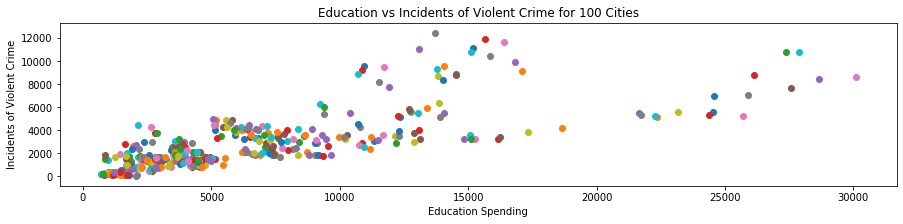

In [24]:
num_cities = 100
random_sample = merged_fbi_df[merged_fbi_df.city_name.isin(merged_fbi_df.city_name.sample(num_cities).values)][cols]
cols_metadata = ['city_name','city_population','year']
fisc_cols =['rev_total','education_services','education','educ_higher','educ_elem_sec','social_services','public_welfare','welfare_cash','welfare_vendors','welfare_other','correction','parks_recreation','housing_commdevt']
cols = cols_metadata + fisc_cols + ['property_crime','violent_crime']
random_sample = random_sample[cols].drop_duplicates()


for i in fisc_cols:
    random_sample[i] = random_sample[i] * random_sample['city_population'] / 10**5
    
    
fig, ax = plt.subplots(figsize=(15, 3))
for i in random_sample['year'].unique():
    for j in random_sample['city_name'].unique():
        by_year = random_sample[random_sample.year==i]
        by_city = by_year[by_year.city_name==j]
        ax.scatter(by_city['education_services'], by_city['violent_crime'],label=str(i)+' '+str(j))

plt.title("Education vs Incidents of Violent Crime for "+str(num_cities)+' Cities')
plt.xlabel('Education Spending')
plt.ylabel('Incidents of Violent Crime')